### Effect of Normalization, Standardization etc.
simulate:
- normal distribution
- random distribution
- left skewness, right skewness

In [46]:
import numpy as np
from sklearn.preprocessing import Normalizer, StandardScaler
from scipy.stats import percentileofscore

# generate random data set
np.random.seed(42)
X_random_dist = np.random.randint(0, 42, size=(3, 2))
X_normal_dist = np.random.normal(loc=0, scale=1, size=(3, 2))
X_left_skewed = np.random.lognormal(mean=0, sigma=1, size=(3, 2))

def transform_data(X):
    # normalize data set
    normalizer = Normalizer()
    X_normalized = normalizer.fit_transform(X)

    # standartize data set
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # estimate percentile column-wise
    X_percentiles = np.zeros_like(X, dtype=float)
    for col in range(X.shape[1]):
        X_percentiles[:, col] = [percentileofscore(X[:, col], value) for value in X[:, col]]
    
    return X, X_normalized, X_scaled, X_percentiles

random_dist = transform_data(X_random_dist)
normal_dist = transform_data(X_normal_dist)
left_skewed = transform_data(X_left_skewed)


In [47]:
print('Initial: \n', random_dist[0])
print('Normalized: \n', random_dist[1])
print('Standardized: \n', random_dist[2])
print('Percentiles: \n', random_dist[3])

Initial: 
 [[38 28]
 [14  7]
 [20 38]]
Normalized: 
 [[0.80505584 0.59319904]
 [0.89442719 0.4472136 ]
 [0.46574643 0.88491822]]
Standardized: 
 [[ 1.37281295  0.28382962]
 [-0.98058068 -1.34174003]
 [-0.39223227  1.05791041]]
Percentiles: 
 [[100.          66.66666667]
 [ 33.33333333  33.33333333]
 [ 66.66666667 100.        ]]


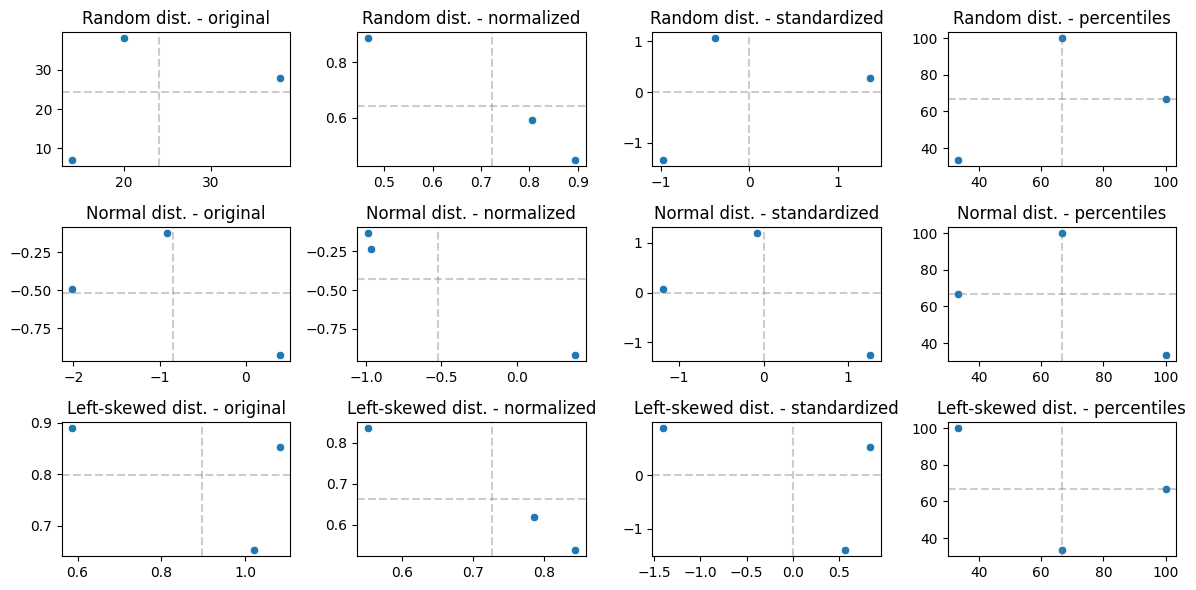

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

methods = ['original', 'normalized', 'standardized', 'percentiles']

fig, axes = plt.subplots(3, len(methods), figsize=(12, 6))

for index, (rd, nd, lf, method) in enumerate(zip(random_dist, normal_dist, left_skewed, methods)):
    # Scatter plot for random_dist
    sns.scatterplot(x=rd[:, 0], y=rd[:, 1], ax=axes[0, index])
    axes[0, index].set_title(f'Random dist. - {method}')
    axes[0, index].axhline(rd[:, 1].mean(), ls='--', c='grey', alpha=0.4)
    axes[0, index].axvline(rd[:, 0].mean(), ls='--', c='grey', alpha=0.4)
    
    # Scatter plot for normal_dist
    sns.scatterplot(x=nd[:, 0], y=nd[:, 1], ax=axes[1, index])
    axes[1, index].set_title(f'Normal dist. - {method}')
    axes[1, index].axhline(nd[:, 1].mean(), ls='--', c='grey', alpha=0.4)
    axes[1, index].axvline(nd[:, 0].mean(), ls='--', c='grey', alpha=0.4)

    # Scatter plot for normal_dist
    sns.scatterplot(x=lf[:, 0], y=lf[:, 1], ax=axes[2, index])
    axes[2, index].set_title(f'Left-skewed dist. - {method}')
    axes[2, index].axhline(lf[:, 1].mean(), ls='--', c='grey', alpha=0.4)
    axes[2, index].axvline(lf[:, 0].mean(), ls='--', c='grey', alpha=0.4)

    

plt.tight_layout()
plt.show()


### Behaviour of Cosine Similarity

In [16]:
import numpy as np
from numpy.linalg import norm
import pandas as pd

A = np.array([
    1,1,1,1,1
])

B = np.array([
    1,1,1,1,1
])

cosine = np.dot(A,B)/(norm(A)*norm(B))
print("Cosine Similarity:", cosine)

A = pd.DataFrame(
    {
        'A':A
    }
)

B = pd.DataFrame(
    {
        'B':B
    }
)

print("Cosine Similarity w/ pandas:", A.T.dot(B))


Cosine Similarity: 0.9999999999999998
Cosine Similarity w/ pandas:    B
A  5
